In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
data = pd.read_csv('../data/LightsOut2022_Captains_Results.csv')

# First entry (index=0) was a test entry (2022-01-06) made by DW to test out the form.
# Form wasn't live until 2022-01-08.
# Removing this entry.
data.drop(0, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

# Rename columns
renamed_columns = [i-2 if ('Captain Tandems' in col) else col for i, col in enumerate(data.columns)]
data.fillna(value='n/a - NotSelected', inplace=True)
data.columns = renamed_columns
data

,Timestamp,Gender Balance Preference,How many captains should we elect?,1,2,3,4,5,6,7,8,9,10,11
0,2022/01/08 7:45:20 AM PST,n/a - NotSelected,3,"Anna, Kate, Peaches","Anna, Kate, Wade","Anna, Kate, Wade, Peaches","Anna, Kate","Anna, Peaches","Kate, Peaches","Anna, Wade, Peaches","Kate, Wade, Peaches","Anna, Wade","Kate, Wade","Wade, Peaches"
1,2022/01/08 7:50:55 AM PST,I would prefer an even number of female-matchi...,4,"Anna, Kate, Wade, Peaches","Anna, Wade, Peaches","Kate, Wade, Peaches","Anna, Kate, Peaches","Anna, Peaches","Kate, Peaches","Wade, Peaches","Kate, Wade","Anna, Kate, Wade","Anna, Wade","Anna, Kate"
2,2022/01/08 8:14:28 AM PST,I would prefer an even number of female-matchi...,n/a - NotSelected,"Anna, Kate, Wade, Peaches","Anna, Kate, Peaches","Kate, Wade, Peaches","Anna, Kate, Wade","Anna, Wade, Peaches","Kate, Peaches","Anna, Peaches","Anna, Kate","Kate, Wade","Anna, Wade","Wade, Peaches"
3,2022/01/08 8:34:24 AM PST,I have no preference.,4,"Anna, Kate, Wade, Peaches","Anna, Wade, Peaches","Anna, Kate, Peaches","Anna, Kate, Wade","Kate, Wade, Peaches","Anna, Peaches","Kate, Peaches","Kate, Wade","Anna, Wade","Wade, Peaches","Anna, Kate"
4,2022/01/08 8:50:17 AM PST,I have no preference.,3,"Anna, Kate, Wade","Anna, Wade, Peaches","Anna, Kate, Wade, Peaches","Anna, Kate, Wade","Anna, Kate, Peaches","Kate, Wade, Peaches","Anna, Wade","Anna, Kate","Kate, Wade","Kate, Peaches","Wade, Peaches"
5,2022/01/08 10:19:37 AM PST,I have no preference.,3,"Anna, Kate, Peaches","Kate, Peaches","Anna, Peaches","Anna, Kate, Wade, Peaches","Anna, Wade, Peaches","Kate, Wade, Peaches","Anna, Kate, Wade","Anna, Kate","Wade, Peaches","Anna, Wade","Kate, Wade"
6,2022/01/08 12:45:04 PM PST,I would prefer an even number of female-matchi...,4,"Anna, Kate, Wade, Peaches","Anna, Kate, Wade","Anna, Kate, Peaches","Anna, Wade, Peaches","Kate, Wade, Peaches","Anna, Kate","Anna, Wade","Anna, Peaches","Kate, Wade","Kate, Wade","Kate, Wade"
7,2022/01/08 1:59:01 PM PST,I have no preference.,4,"Anna, Kate, Wade, Peaches","Anna, Kate, Peaches","Anna, Wade, Peaches","Anna, Kate, Wade","Kate, Wade, Peaches","Anna, Peaches","Anna, Wade","Kate, Peaches","Wade, Peaches","Anna, Kate","Kate, Wade"
8,2022/01/08 2:01:57 PM PST,I would prefer an even number of female-matchi...,2,"Anna, Peaches","Anna, Kate, Peaches","Kate, Peaches","Anna, Kate","Anna, Kate, Wade, Peaches","Anna, Wade, Peaches","Kate, Wade, Peaches","Anna, Kate, Wade","Anna, Wade","Kate, Wade","Wade, Peaches"
9,2022/01/08 3:28:42 PM PST,I would prefer an even number of female-matchi...,4,"Anna, Kate, Wade, Peaches","Anna, Wade, Peaches","Anna, Peaches","Wade, Peaches","Anna, Wade","Kate, Peaches","Kate, Wade","Kate, Wade, Peaches","Anna, Kate, Peaches","Anna, Kate, Wade","Anna, Kate"


In [3]:
# Check data for inconsistencies
captain_data_raw = data[[col for col in data.columns if type(col)==int]]
captain_data = pd.melt(captain_data_raw, value_vars=list(range(1,12)), value_name='Tandem', var_name='Rank')

# Should be exactly 28 of each!!!
captain_data.Tandem.value_counts()

Anna, Kate, Wade, Peaches    34
Kate, Wade                   32
Anna, Kate, Wade             31
Anna, Kate, Peaches          28
Kate, Wade, Peaches          27
Anna, Peaches                27
Anna, Wade                   27
Anna, Kate                   27
Anna, Wade, Peaches          27
Kate, Peaches                24
Wade, Peaches                24
Name: Tandem, dtype: int64

In [4]:
# Identify rows with repeated entries
data_raw = data[list(range(1,12))]
data_raw

bad_data = data_raw[data_raw.apply(lambda x: pd.value_counts(x)[0]>1, axis=1)].copy() # If any tandem has more than one vote on a single form

bad_data

,1,2,3,4,5,6,7,8,9,10,11
4,"Anna, Kate, Wade","Anna, Wade, Peaches","Anna, Kate, Wade, Peaches","Anna, Kate, Wade","Anna, Kate, Peaches","Kate, Wade, Peaches","Anna, Wade","Anna, Kate","Kate, Wade","Kate, Peaches","Wade, Peaches"
6,"Anna, Kate, Wade, Peaches","Anna, Kate, Wade","Anna, Kate, Peaches","Anna, Wade, Peaches","Kate, Wade, Peaches","Anna, Kate","Anna, Wade","Anna, Peaches","Kate, Wade","Kate, Wade","Kate, Wade"
17,"Anna, Kate, Wade","Anna, Kate, Wade, Peaches","Anna, Kate","Anna, Kate, Peaches","Kate, Wade","Anna, Peaches","Anna, Wade","Kate, Wade, Peaches","Anna, Wade, Peaches","Kate, Wade","Kate, Wade"
21,"Anna, Kate, Wade, Peaches","Anna, Kate, Peaches","Anna, Kate, Wade","Anna, Peaches","Kate, Wade","Anna, Kate, Wade, Peaches","Anna, Kate, Wade, Peaches","Anna, Kate, Wade, Peaches","Anna, Kate, Wade, Peaches","Anna, Kate, Wade, Peaches","Anna, Kate, Wade, Peaches"
22,"Anna, Kate, Wade","Anna, Kate, Wade, Peaches","Anna, Kate","Anna, Wade","Kate, Wade","Anna, Wade, Peaches","Anna, Kate, Peaches","Kate, Wade, Peaches","Anna, Kate, Wade","Anna, Peaches","Anna, Kate, Wade"


In [5]:
# Fixing bad data
#
# Strategy/Assumptions: 
# (1) assume highest ranking of tandem is correct
# (2) remove any further instances of that tandem
#
# Ex: in the first row (index 4) above, "Anna, Kate, Wade" is listed twice. The second instance would be removed.  

FILL_VALUE = 'n/a - RepeatedTandem'

for i, row in bad_data.iterrows():
    print(i)
    for j in range(len(row)):
        if j>0:
            if row.iloc[j] in list(row.iloc[:j]):
                print(f"Repeat entry found: in response {i} for choice {j+1}:", row.iloc[j], " -- Replacing")
                data.loc[i, j+1] = FILL_VALUE
                
data


4
Repeat entry found: in response 4 for choice 4: Anna, Kate, Wade  -- Replacing
6
Repeat entry found: in response 6 for choice 10: Kate, Wade  -- Replacing
Repeat entry found: in response 6 for choice 11: Kate, Wade  -- Replacing
17
Repeat entry found: in response 17 for choice 10: Kate, Wade  -- Replacing
Repeat entry found: in response 17 for choice 11: Kate, Wade  -- Replacing
21
Repeat entry found: in response 21 for choice 6: Anna, Kate, Wade, Peaches  -- Replacing
Repeat entry found: in response 21 for choice 7: Anna, Kate, Wade, Peaches  -- Replacing
Repeat entry found: in response 21 for choice 8: Anna, Kate, Wade, Peaches  -- Replacing
Repeat entry found: in response 21 for choice 9: Anna, Kate, Wade, Peaches  -- Replacing
Repeat entry found: in response 21 for choice 10: Anna, Kate, Wade, Peaches  -- Replacing
Repeat entry found: in response 21 for choice 11: Anna, Kate, Wade, Peaches  -- Replacing
22
Repeat entry found: in response 22 for choice 9: Anna, Kate, Wade  -- Repl

,Timestamp,Gender Balance Preference,How many captains should we elect?,1,2,3,4,5,6,7,8,9,10,11
0,2022/01/08 7:45:20 AM PST,n/a - NotSelected,3,"Anna, Kate, Peaches","Anna, Kate, Wade","Anna, Kate, Wade, Peaches","Anna, Kate","Anna, Peaches","Kate, Peaches","Anna, Wade, Peaches","Kate, Wade, Peaches","Anna, Wade","Kate, Wade","Wade, Peaches"
1,2022/01/08 7:50:55 AM PST,I would prefer an even number of female-matchi...,4,"Anna, Kate, Wade, Peaches","Anna, Wade, Peaches","Kate, Wade, Peaches","Anna, Kate, Peaches","Anna, Peaches","Kate, Peaches","Wade, Peaches","Kate, Wade","Anna, Kate, Wade","Anna, Wade","Anna, Kate"
2,2022/01/08 8:14:28 AM PST,I would prefer an even number of female-matchi...,n/a - NotSelected,"Anna, Kate, Wade, Peaches","Anna, Kate, Peaches","Kate, Wade, Peaches","Anna, Kate, Wade","Anna, Wade, Peaches","Kate, Peaches","Anna, Peaches","Anna, Kate","Kate, Wade","Anna, Wade","Wade, Peaches"
3,2022/01/08 8:34:24 AM PST,I have no preference.,4,"Anna, Kate, Wade, Peaches","Anna, Wade, Peaches","Anna, Kate, Peaches","Anna, Kate, Wade","Kate, Wade, Peaches","Anna, Peaches","Kate, Peaches","Kate, Wade","Anna, Wade","Wade, Peaches","Anna, Kate"
4,2022/01/08 8:50:17 AM PST,I have no preference.,3,"Anna, Kate, Wade","Anna, Wade, Peaches","Anna, Kate, Wade, Peaches",n/a - RepeatedTandem,"Anna, Kate, Peaches","Kate, Wade, Peaches","Anna, Wade","Anna, Kate","Kate, Wade","Kate, Peaches","Wade, Peaches"
5,2022/01/08 10:19:37 AM PST,I have no preference.,3,"Anna, Kate, Peaches","Kate, Peaches","Anna, Peaches","Anna, Kate, Wade, Peaches","Anna, Wade, Peaches","Kate, Wade, Peaches","Anna, Kate, Wade","Anna, Kate","Wade, Peaches","Anna, Wade","Kate, Wade"
6,2022/01/08 12:45:04 PM PST,I would prefer an even number of female-matchi...,4,"Anna, Kate, Wade, Peaches","Anna, Kate, Wade","Anna, Kate, Peaches","Anna, Wade, Peaches","Kate, Wade, Peaches","Anna, Kate","Anna, Wade","Anna, Peaches","Kate, Wade",n/a - RepeatedTandem,n/a - RepeatedTandem
7,2022/01/08 1:59:01 PM PST,I have no preference.,4,"Anna, Kate, Wade, Peaches","Anna, Kate, Peaches","Anna, Wade, Peaches","Anna, Kate, Wade","Kate, Wade, Peaches","Anna, Peaches","Anna, Wade","Kate, Peaches","Wade, Peaches","Anna, Kate","Kate, Wade"
8,2022/01/08 2:01:57 PM PST,I would prefer an even number of female-matchi...,2,"Anna, Peaches","Anna, Kate, Peaches","Kate, Peaches","Anna, Kate","Anna, Kate, Wade, Peaches","Anna, Wade, Peaches","Kate, Wade, Peaches","Anna, Kate, Wade","Anna, Wade","Kate, Wade","Wade, Peaches"
9,2022/01/08 3:28:42 PM PST,I would prefer an even number of female-matchi...,4,"Anna, Kate, Wade, Peaches","Anna, Wade, Peaches","Anna, Peaches","Wade, Peaches","Anna, Wade","Kate, Peaches","Kate, Wade","Kate, Wade, Peaches","Anna, Kate, Peaches","Anna, Kate, Wade","Anna, Kate"


In [6]:
# Check data to make sure inconsistencies were fixed 
#
# Note: we should expect no more than 28 counts for each tandem now.
captain_data_raw = data[[col for col in data.columns if type(col)==int]]
captain_data = pd.melt(captain_data_raw, value_vars=list(range(1,12)), value_name='Tandem', var_name='Rank')

# Should be no more than 28 of each now.
captain_data.Tandem.value_counts()

Anna, Kate, Wade             28
Kate, Wade                   28
Anna, Kate, Peaches          28
Anna, Kate, Wade, Peaches    28
Kate, Wade, Peaches          27
Anna, Peaches                27
Anna, Wade                   27
Anna, Kate                   27
Anna, Wade, Peaches          27
Kate, Peaches                24
Wade, Peaches                24
n/a - RepeatedTandem         13
Name: Tandem, dtype: int64

I have no preference.                                                                         13
I would prefer an even number of female-matching and male-matching captains.                  11
n/a - NotSelected                                                                              2
I would prefer the leadership team (including coaches) to be at least half womxn               1
I would prefer that there aren't more male-matching captains than female-matching captains     1
Name: Gender Balance Preference, dtype: int64


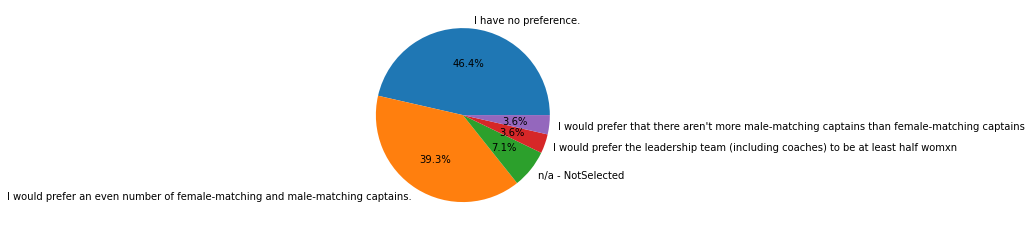

In [7]:
# Look at results for Gender balance

def display_gender_balance(data): 
    gender_counts = data['Gender Balance Preference'].value_counts()
    print(gender_counts)
    plt.figure(facecolor='w')
    plt.pie(x=gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
    plt.show()
    
display_gender_balance(data)

4                    11
3                     8
2                     4
n/a - NotSelected     4
3 or 4                1
Name: How many captains should we elect?, dtype: int64


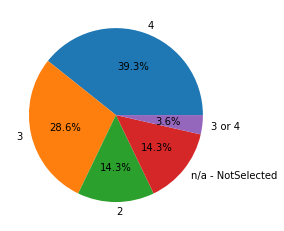

In [8]:
# Look at results for number of captains

def display_results_number_captains(data):
    number_counts = data['How many captains should we elect?'].value_counts()
    print(number_counts)
    plt.figure(facecolor='w')
    plt.pie(x=number_counts.values, labels=number_counts.index, autopct='%1.1f%%')
    plt.show()
    
display_results_number_captains(data)

In [9]:
# Look at captain sets preferences
#
# Uses the following scoring system:
# 1st place = 11 points, 2nd place = 10 points, 3rd place = 9 points, ..., 11 place = 1 points, Not listed = 0 points
def get_captain_tandem_results(data):
    captain_data_raw = data[[col for col in data.columns if type(col)==int]]

    # Calculate the point value for each option
    captain_data = pd.melt(captain_data_raw, value_vars=list(range(1,12)), value_name='Tandem', var_name='Rank')
    captain_data['Points'] = 12-captain_data['Rank']

    captain_results = captain_data[['Tandem','Points']].groupby('Tandem').agg(sum).sort_values('Points', ascending=False)

    # Drop n/a - Repeated Tandem
    captain_data = captain_data[captain_data.Tandem!='n/a - RepeatedTandem']
    if 'n/a - RepeatedTandem' in captain_results.index:
        captain_results.drop('n/a - RepeatedTandem', inplace=True, axis=0)
    
    return captain_data, captain_results

captain_data, captain_results = get_captain_tandem_results(data)

captain_results

,Points
Tandem,
"Anna, Kate, Wade, Peaches",257
"Anna, Kate, Peaches",242
"Anna, Kate, Wade",228
"Anna, Wade, Peaches",204
"Anna, Peaches",177
"Kate, Wade, Peaches",160
"Anna, Kate",135
"Anna, Wade",133
"Kate, Peaches",115


In [10]:
# Get breakdown of each tandem

def get_tandem_data(captain_results, captain_data):
    tandem_data = pd.concat([captain_data['Tandem'], pd.get_dummies(captain_data['Rank'])], axis=1)
    tandem_data = tandem_data.groupby('Tandem').agg(sum)
    tandem_data['TotalPoints'] = captain_results
    tandem_data.sort_values('TotalPoints', ascending=False, inplace=True)
    return tandem_data

tandem_data = get_tandem_data(captain_results, captain_data)

tandem_data

,1,2,3,4,5,6,7,8,9,10,11,TotalPoints
Tandem,,,,,,,,,,,,
"Anna, Kate, Wade, Peaches",13,3,4,4,2,0,0,0,0,0,2,257
"Anna, Kate, Peaches",4,7,8,3,3,0,1,0,2,0,0,242
"Anna, Kate, Wade",5,7,4,4,1,2,1,1,1,2,0,228
"Anna, Wade, Peaches",0,8,2,7,3,2,2,0,1,2,0,204
"Anna, Peaches",4,1,2,1,2,9,2,2,3,1,0,177
"Kate, Wade, Peaches",0,0,3,2,8,2,3,7,2,0,0,160
"Anna, Kate",1,0,3,3,0,5,2,5,1,3,4,135
"Anna, Wade",1,1,0,1,4,0,8,4,4,4,0,133
"Kate, Peaches",0,1,1,1,1,5,4,3,4,3,1,115


In [11]:
# Look at subsets based on number of captains desired

for num_captains in ['4', '3', '2', 'n/a - NotSelected']:
    num_people_in_group = data['How many captains should we elect?'].value_counts()[num_captains]
    subset = data[data['How many captains should we elect?']==num_captains]
    captain_data_here, captain_results_here = get_captain_tandem_results(subset)
    tandem_data_here = get_tandem_data(captain_results_here, captain_data_here)
    
    print(f"\n{num_captains} captains preferred (n = {num_people_in_group})")
    print(tandem_data_here)
    
    


4 captains preferred (n = 11)
                            1  2  3  4  5  6  7  8  9  10  11  TotalPoints
Tandem                                                                    
Anna, Kate, Wade, Peaches  11  0  0  0  0  0  0  0  0   0   0          121
Anna, Kate, Peaches         0  3  5  1  1  0  0  0  1   0   0           93
Anna, Kate, Wade            0  4  2  3  0  0  0  0  1   1   0           87
Anna, Wade, Peaches         0  4  1  3  1  0  0  0  0   1   0           82
Kate, Wade, Peaches         0  0  2  1  5  0  0  1  1   0   0           68
Anna, Peaches               0  0  1  1  1  4  1  1  2   0   0           63
Anna, Wade                  0  0  0  0  2  0  4  2  1   1   0           47
Kate, Wade                  0  0  0  0  1  1  2  3  1   2   1           43
Kate, Peaches               0  0  0  0  0  2  2  2  2   1   0           38
Anna, Kate                  0  0  0  1  0  3  0  0  0   2   4           34
Wade, Peaches               0  0  0  1  0  0  1  1  1   1   4        